In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
from scipy.stats import stats

In [2]:
df = pd.read_excel(r'C:\Users\mohit\Downloads\Global_Superstore.xls').drop(columns=['Row ID'])

In [3]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df = df[df['Profit']!=np.Inf]

In [4]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11


In [5]:
df['Order Year'].unique()

array([2012, 2013, 2011, 2014])

In [6]:
df['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [7]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
df['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [9]:
df['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [10]:
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [11]:
df['Sub-Category'].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

In [12]:
df['Order Priority'].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

# Categorical estimate plots:
## 1) Bar plot:

##### estimator = np.mean, np.std, np.median, np.sum, np.var (what we want to plot on bar)
##### errorbar shows confidence interval on each bar

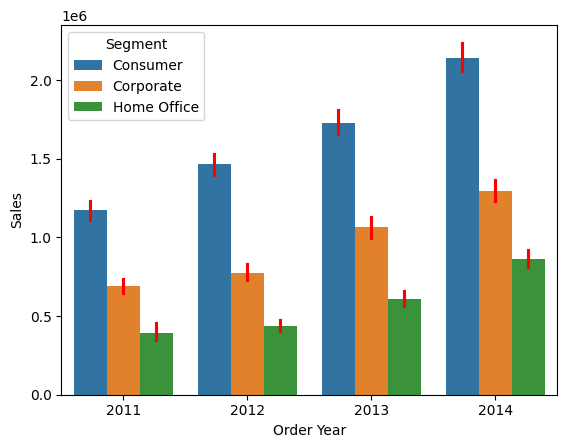

In [13]:
sns.barplot(data=df, x='Order Year', y='Sales', estimator=np.sum, hue='Segment', errorbar=('ci',95), err_kws={'color': 'r'})
plt.show()

## 2) Count plot:
##### count each category and plot it:

In [14]:
df1 = sns.load_dataset('titanic')

In [15]:
df1.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


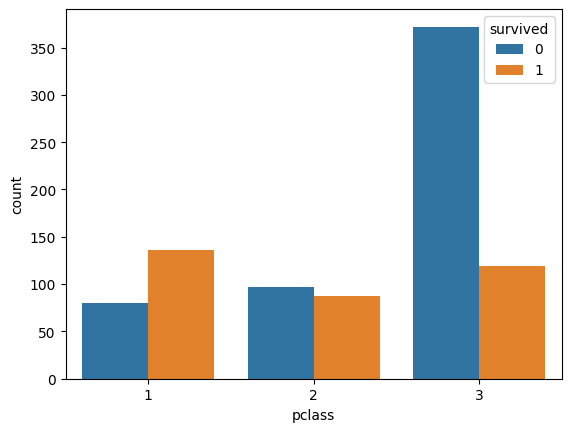

In [16]:
sns.countplot(data=df1, x='pclass', hue='survived')
plt.show()

## 3) Point plot:
##### estimator attribute: mean, std, sum, var

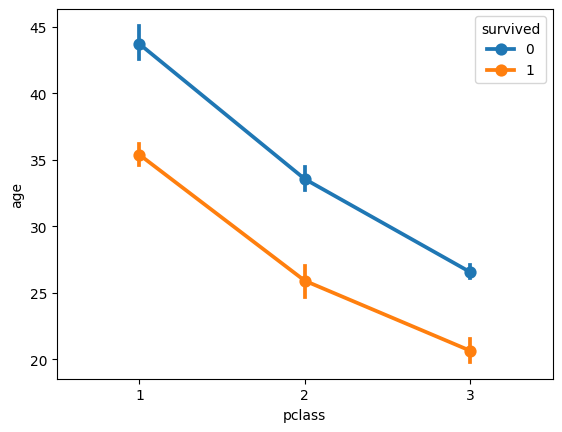

In [17]:
sns.pointplot(data=df1, x='pclass', y='age',hue='survived', estimator='mean', errorbar=('ci',50))
plt.show()

# errorbar with CI=50%

<Axes: xlabel='pclass', ylabel='age'>

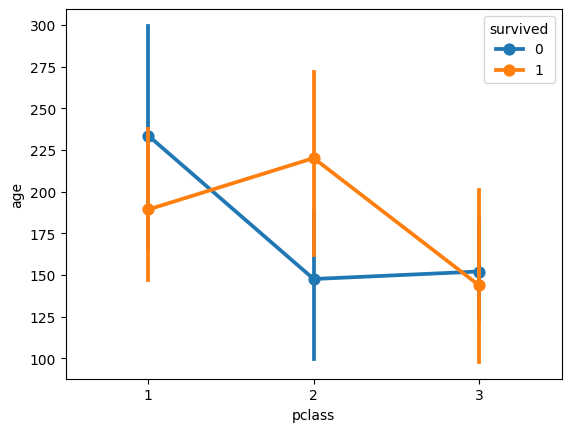

In [18]:
sns.pointplot(data=df1, x='pclass', y='age',hue='survived', estimator='var')

In [19]:
df1[(df1['survived']==0)&(df1['pclass']==2)]['age'].var()

147.6609238451935

# Relational plot:

## 1) line plot:

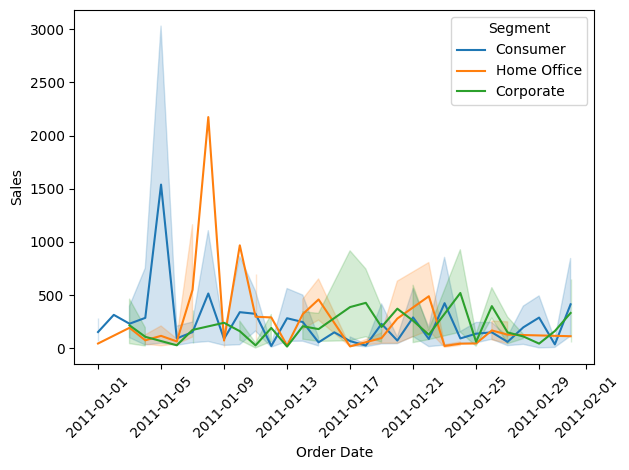

In [20]:
sns.lineplot(data=df[df['Order Date']<='2011-01-31'], x='Order Date', y='Sales', hue='Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2) Scatter plot:

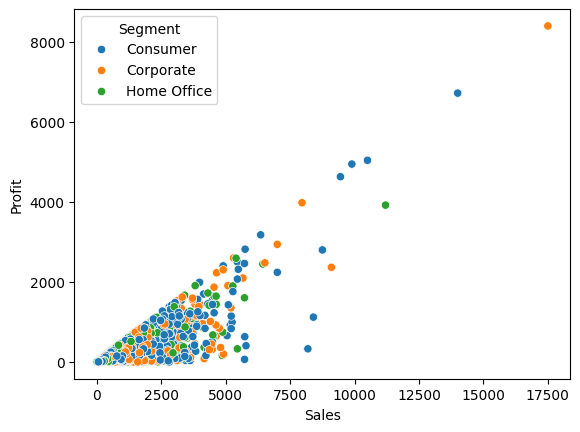

In [21]:
sns.scatterplot(data=df[df['Profit']>=0], x='Sales', y='Profit', hue='Segment')
plt.show()

### Relation plot:
###### takes kind = 'scatter' or 'line'
###### row and column attributes plot each category in separate row or column

<Figure size 500x500 with 0 Axes>

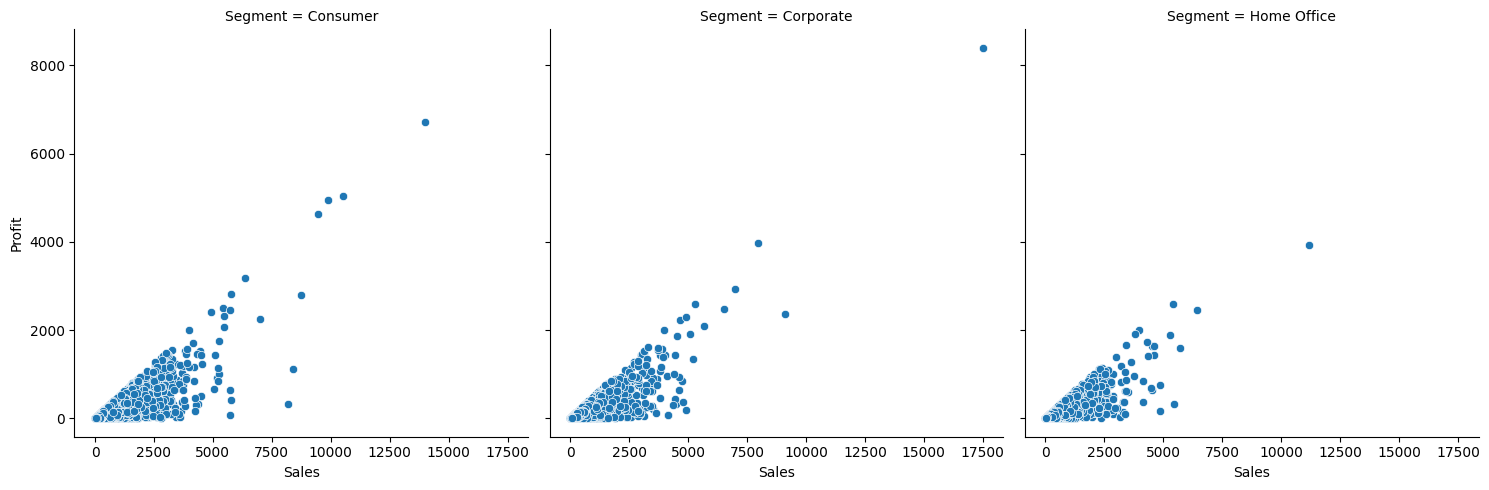

In [22]:
plt.figure(figsize=(5,5))
sns.relplot(data=df[df['Profit']>=0],kind='scatter',col='Segment', x='Sales', y='Profit')
plt.show()

In [23]:
df[df['Profit']<0]['Profit'].sum()

-920646.15572

In [24]:
df[df['Profit']>=0]['Profit'].sum()

2388103.447

# Categorical plots:

## Categorical scatter plot:
### 1) strip plot: 

Text(0.5, 1.0, 'jitter variation')

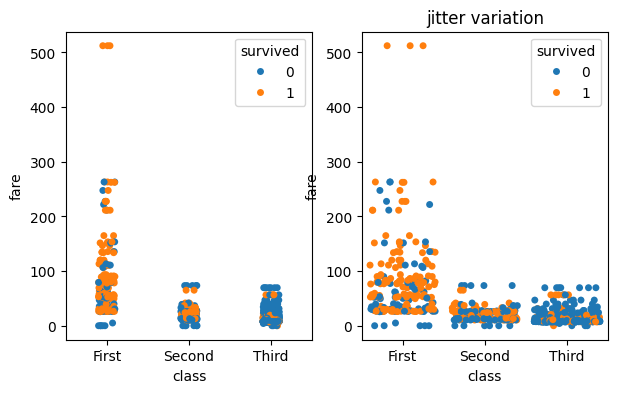

In [25]:
# jitter is for when data points are overlapping each other then it shows better distribution of data points
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,4))
sns.stripplot(data=df1, x='class',y='fare', hue='survived',ax=ax[0])
sns.stripplot(data=df1, x='class',y='fare', hue='survived',ax=ax[1],jitter=0.4)
ax[1].set_title('jitter variation')

### 2) swarm plot:
###### Shows distribution of data points more clearly that if one particular value has more point then we can clearly distinguish them. 

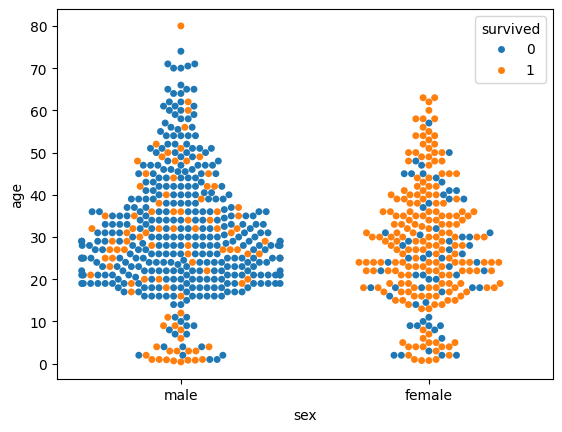

In [26]:
sns.swarmplot(data=df1, x='sex',y='age', hue='survived')
plt.show()

## Categorical Distribution plot:

### 1) Box plot 

In [27]:
df1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

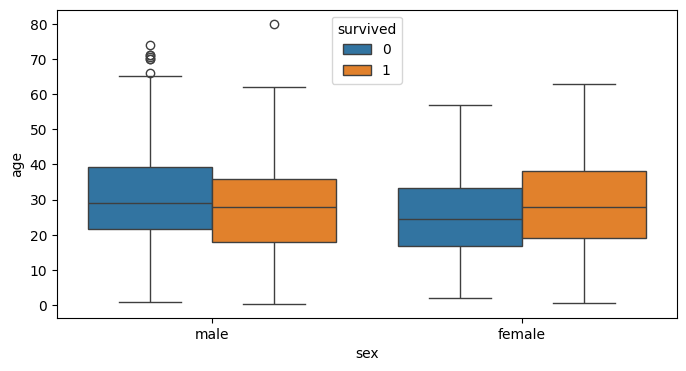

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df1, x='sex', y='age', hue='survived')
plt.show()

### 2) Boxen plot 
##### Boxen plot gives very good idea about the distribution of large datasets:
##### k_depth parameter allows to plot the data upto specific number of boxes. Basically this parameter will divides the dat into n number of times

<Axes: xlabel='sex', ylabel='age'>

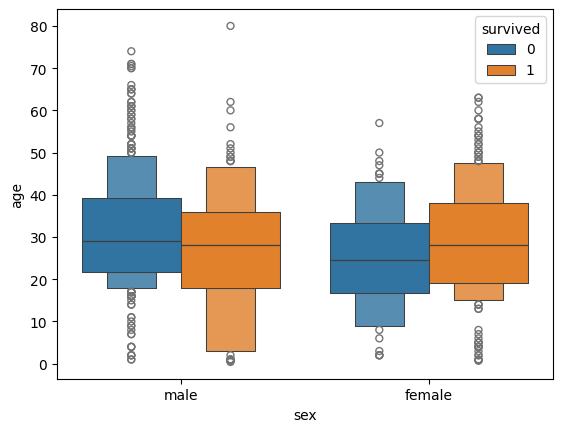

In [29]:
sns.boxenplot(data=df1, x='sex', y='age', hue='survived', k_depth=2)

### 3) Violin plot: 
#### It is a combination of Box Plot and kde plot

<Axes: xlabel='sex', ylabel='age'>

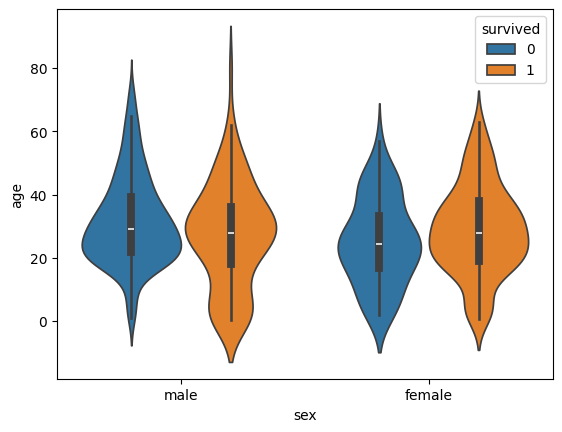

In [30]:
sns.violinplot(data=df1, x='sex', y='age', hue='survived')

###### split=True --> plot categories on different side so graph will not be symmetric anymore 

<Axes: xlabel='sex', ylabel='age'>

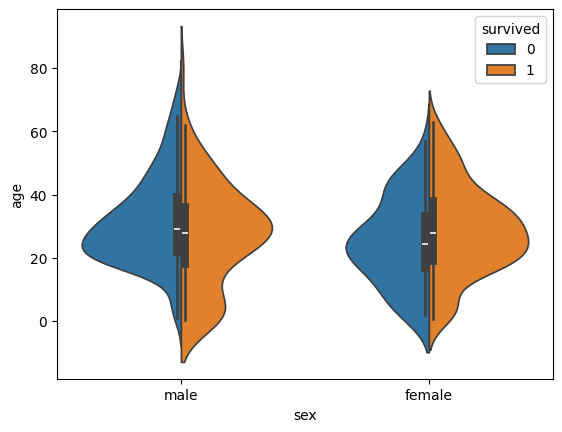

In [31]:
sns.violinplot(data=df1, x='sex', y='age', hue='survived', split=True)

<Axes: xlabel='Segment', ylabel='Quantity'>

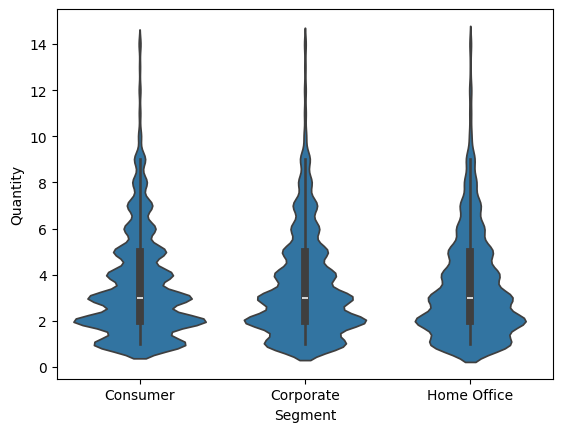

In [32]:
sns.violinplot(data=df[df['Profit']>0], x='Segment', y='Quantity')

# Distribution Plot

<Figure size 300x300 with 0 Axes>

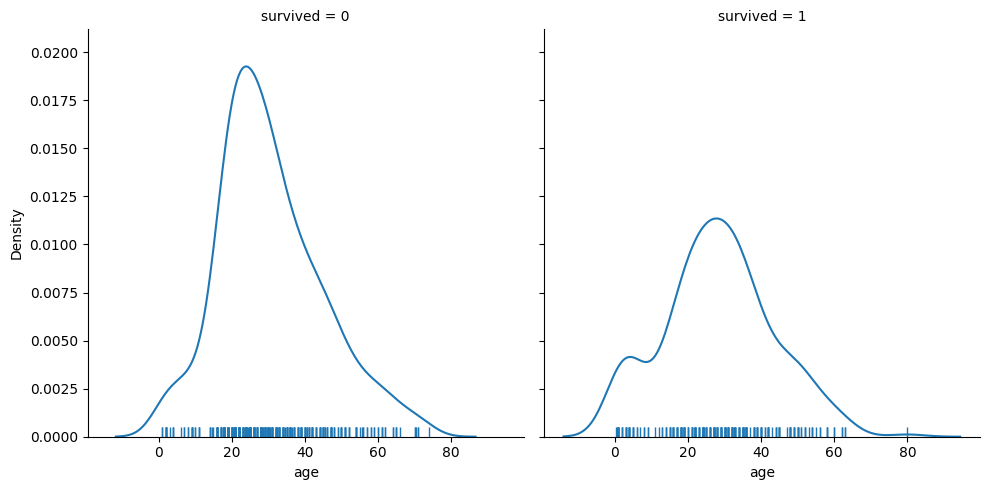

In [33]:
plt.figure(figsize=(3,3))
sns.displot(data=df1, x='age', col='survived', rug=True, kind='kde')
plt.show()

# rug=True -- shows density for the data

## 1) Histogram plot 

###### frequency = no of observations/bin_width 

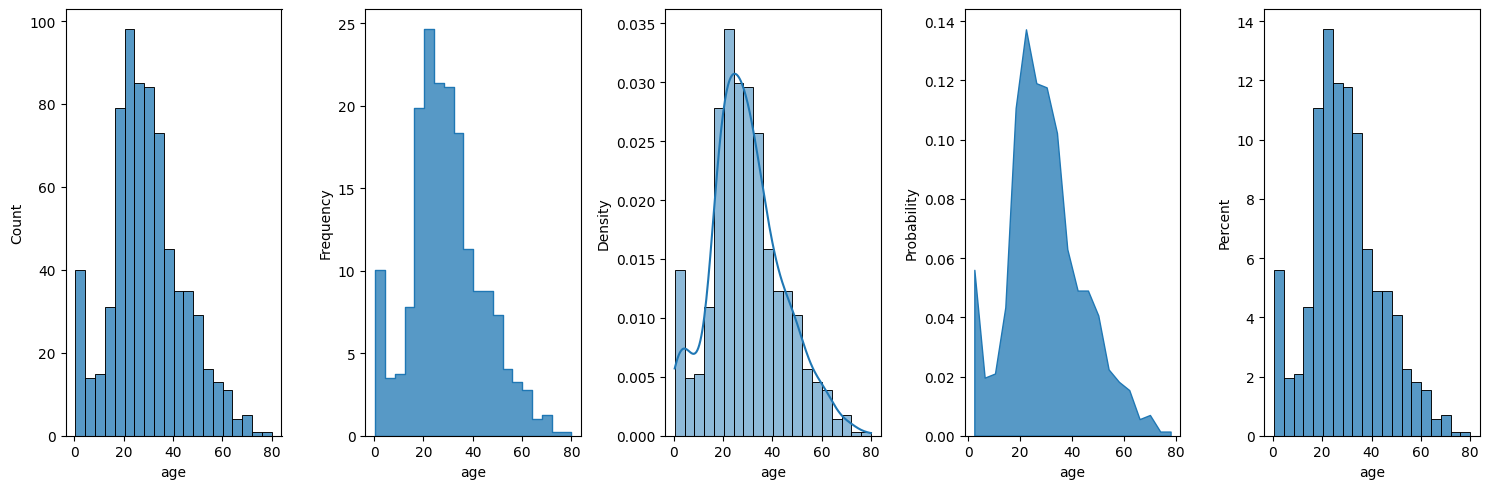

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))
sns.histplot(data=df1, x='age', stat='count', ax=ax[0])
sns.histplot(data=df1, x='age', stat='frequency', ax=ax[1], element='step')
sns.histplot(data=df1, x='age', stat='density', ax=ax[2], kde=True)
sns.histplot(data=df1, x='age', stat='probability', ax=ax[3], element='poly')
sns.histplot(data=df1, x='age', stat='percent', ax=ax[4])
plt.tight_layout()

## 2) kde plot: 

<Axes: xlabel='fare', ylabel='Density'>

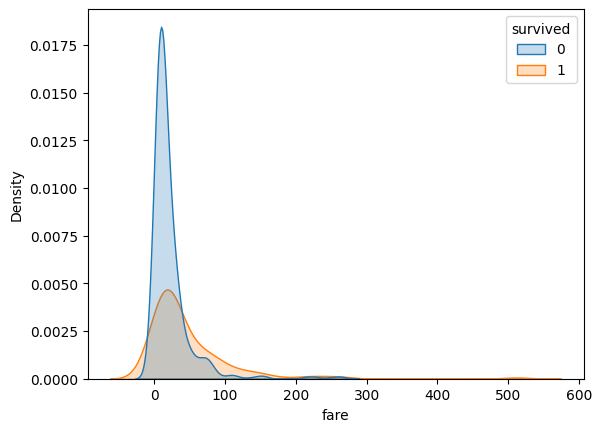

In [35]:
sns.kdeplot(data=df1, x='fare', hue='survived',fill=True)

## 3) Estimator of Cumulative Distribution Function: 

<Axes: xlabel='age', ylabel='Proportion'>

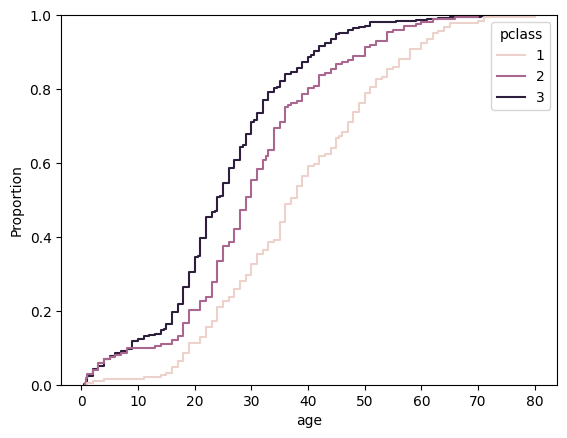

In [36]:
sns.ecdfplot(data=df1, x='age', hue='pclass')

## Rug plot: 

<Axes: xlabel='age'>

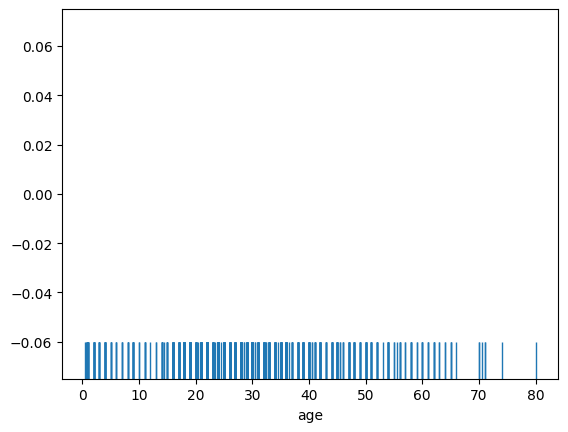

In [37]:
# shows density of the data
sns.rugplot(data=df1, x='age', height=0.1)

# Multiple plots:

## 1) Pair plot: 

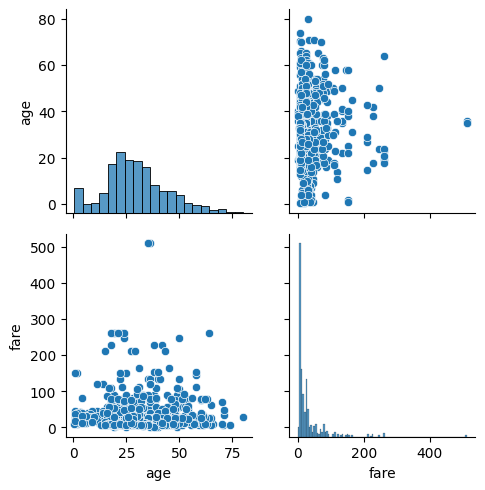

In [38]:
pair = sns.PairGrid(data=df1, vars=['age','fare'])
pair.map_diag(sns.histplot)
pair.map_offdiag(sns.scatterplot)

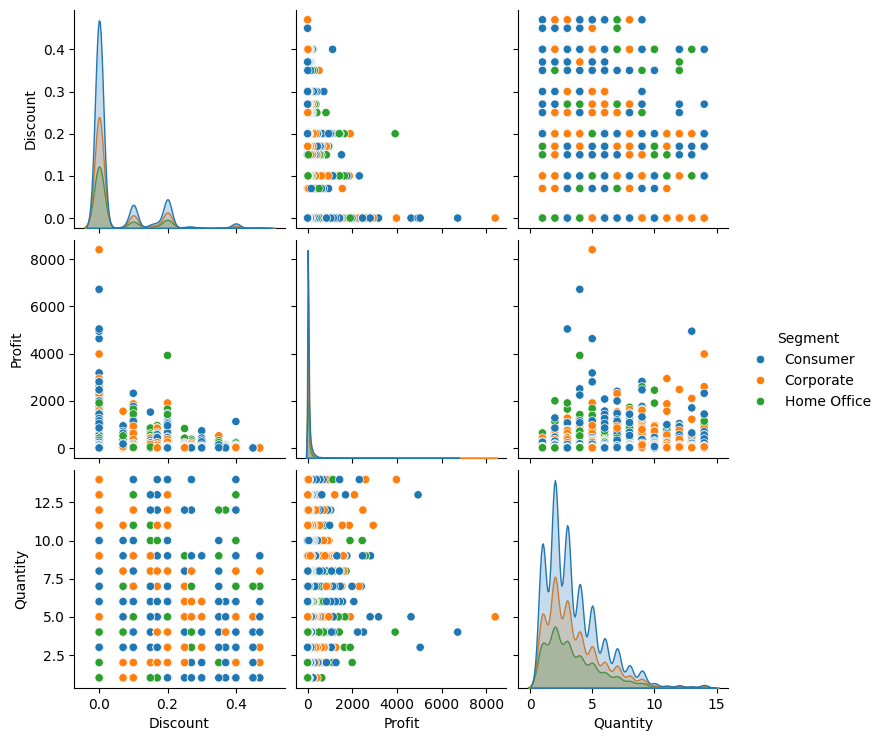

In [39]:
sns.pairplot(data=df[df['Profit']>0], vars=['Discount','Profit','Quantity'], hue='Segment')

## Joint plot:

In [40]:
a = np.random.rand(500)
b = np.random.rand(500)

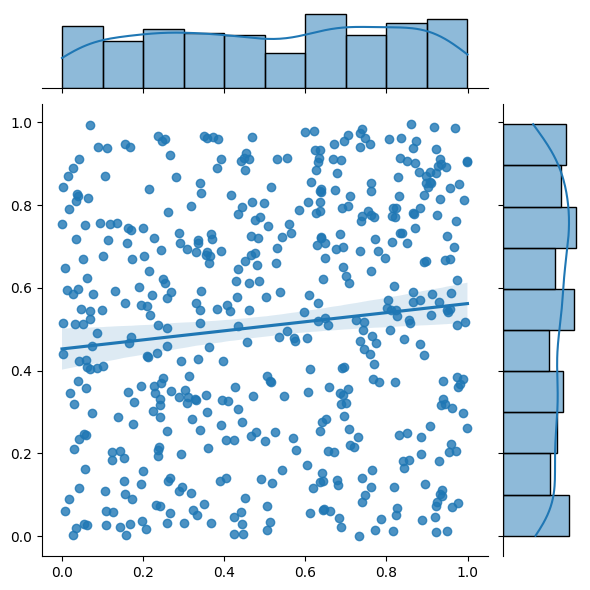

In [41]:
sns.jointplot(x=a, y=b, kind='reg')

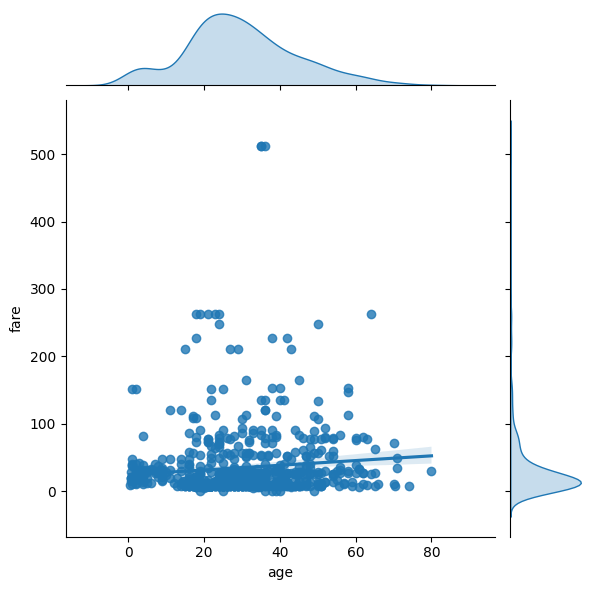

In [42]:
j = sns.JointGrid(data=df1, y='fare', x='age')
j.plot_joint(sns.regplot)
j.plot_marginals(sns.kdeplot, fill=True)

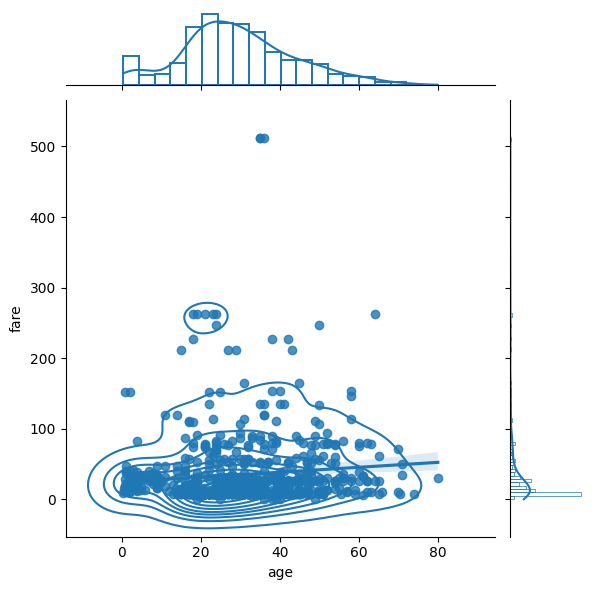

In [43]:
sns.jointplot(data=df1, x='age',y='fare', kind='reg', marginal_kws={'fill':False}).plot_joint(sns.kdeplot)

# Regression plot:

In [44]:
df2 = sns.load_dataset('tips')

In [45]:
df2.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<Axes: xlabel='tip', ylabel='total_bill'>

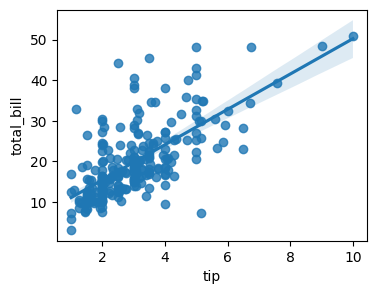

In [46]:
plt.figure(figsize=(4,3))
sns.regplot(data=df2, y='total_bill', x='tip')

##### Polynomial regression plot:

In [47]:
x1 = np.random.randn(200)
y1 = []
for i in range(len(x1)):
    y1.append(x1[i]**3-2*x1[i]**2+x1[i]+5+np.random.randint(10))
y1 = np.ravel(y1)

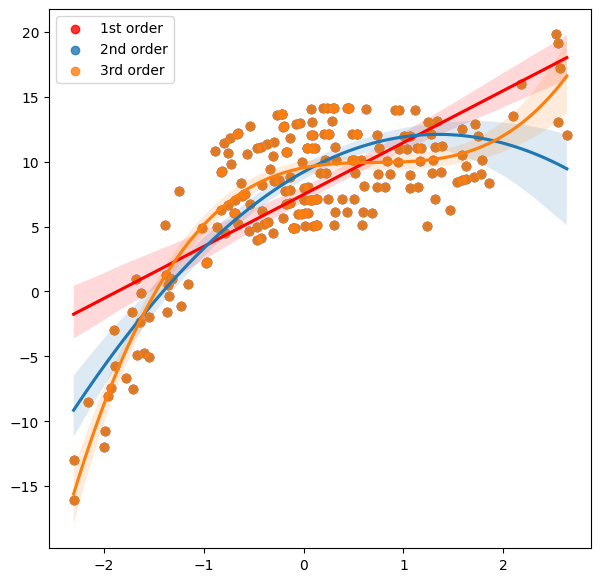

In [48]:
plt.figure(figsize=(7,7))
sns.regplot(x=x1, y=y1, label='1st order',color='r')
sns.regplot(x=x1, y=y1, order=2, label='2nd order')
sns.regplot(x=x1, y=y1, order=3, label='3rd order')
plt.legend()
plt.show()

# lm plot:
### combination of regplot and FacetGrid

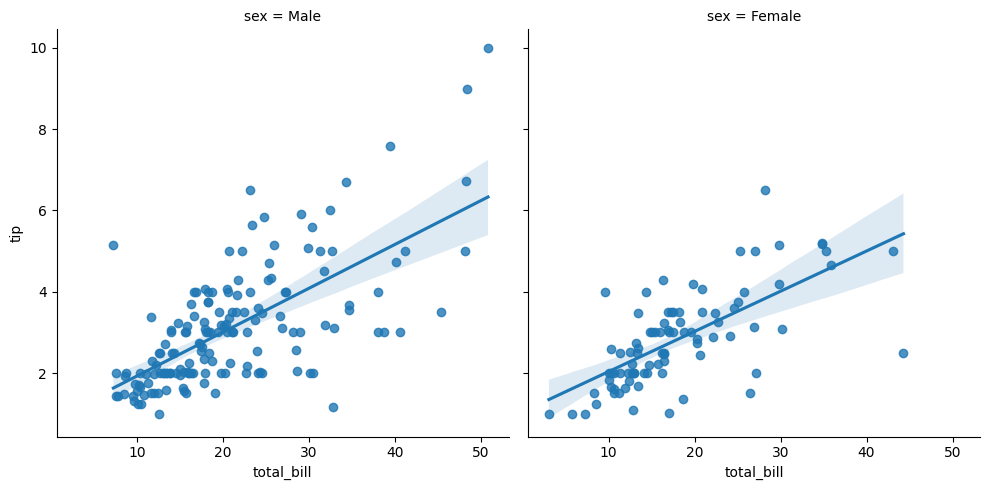

In [49]:
sns.lmplot(data=df2, x='total_bill', y='tip', col='sex')

# Residplot: residual plot
### difference between actual and predicted point. Plot of this difference is residplot

<Axes: xlabel='total_bill', ylabel='tip'>

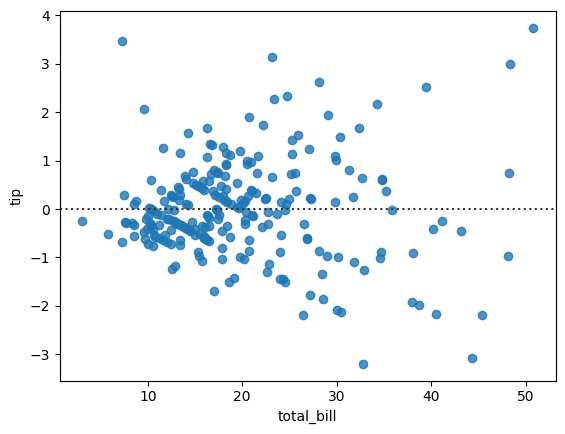

In [50]:
sns.residplot(data=df2, x='total_bill',y='tip')